In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from code_preparation.src.utils import *

In [2]:
pd.__version__

'1.0.1'

# Load data

In [3]:
datasets = read_split_csv("/App/Data/split_quad/")
testds = datasets["test"].sort_index()
testds

val.csv
train.csv
test.csv
lourd.csv


,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed
index,,,,,,,,,,,,,,,,,,,,,
118,2019-04-07 10:13:00,1,0.9,1.3,45.0,23.836542,5.423110,-79.782396,40.458047,270.509899,...,0.010792,-0.019132,-0.169374,-9.826570,4,0,25,R5,129.268190,129.268190
123,2019-04-07 10:13:00,1,1.7,1.1,42.0,22.982643,16.841858,-79.782395,40.458047,270.586554,...,-0.008038,-0.085659,-0.389016,-9.869528,4,0,25,R5,387.070410,385.889010
124,2019-04-07 10:13:00,1,1.8,1.2,37.0,22.883730,18.289080,-79.782395,40.458047,270.588378,...,0.037328,0.099279,-0.317105,-9.804939,4,0,25,R5,418.522360,410.715924
132,2019-04-07 10:13:00,1,3.0,1.6,32.0,22.498098,22.598942,-79.782395,40.458047,270.891601,...,0.008932,0.356533,-0.060797,-9.858566,4,0,25,R5,508.433216,491.404341
134,2019-04-07 10:13:00,1,3.3,1.6,30.0,22.440504,22.750025,-79.782395,40.458048,270.992651,...,-0.017490,0.309356,-0.143265,-10.095943,4,0,25,R5,510.522024,502.439681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257739,2019-10-24 10:10:00,279,113.5,2.9,184.0,21.346212,20.833647,-79.782782,40.459021,270.111220,...,-0.056070,0.319661,-0.103407,-9.423273,10,0,25-50-100-25,R7,444.719449,426.713943
257744,2019-10-24 10:10:00,279,114.3,3.1,191.0,21.492702,18.607151,-79.782783,40.459020,270.058250,...,0.223050,0.105406,-0.268932,-9.931271,10,0,25-50-100-25,R7,399.917961,322.810534
257750,2019-10-24 10:10:00,279,115.2,2.5,187.0,22.449268,1.701680,-79.782783,40.459020,270.108292,...,0.010206,0.326516,-0.423837,-9.819096,10,0,25-50-100-25,R7,38.201462,-31.547928


In [4]:
predictions = pd.read_csv("/App/code_preparation/baselines/predictions/pred.csv", index_col=0)
predictions

,mean,std
index,,
118,226.515747,160.082321
123,196.873947,167.558197
124,190.280228,173.777771
132,431.736633,90.477760
134,470.684113,69.661583
...,...,...
257739,412.818451,60.234707
257744,298.920105,88.220421
257750,129.628555,114.325897


In [5]:
testds["power_pred"] = predictions["mean"]
testds["power_pred_std"] = predictions["std"]
testds

,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed,power_pred,power_pred_std
index,,,,,,,,,,,,,,,,,,,,,
118,2019-04-07 10:13:00,1,0.9,1.3,45.0,23.836542,5.423110,-79.782396,40.458047,270.509899,...,-0.169374,-9.826570,4,0,25,R5,129.268190,129.268190,226.515747,160.082321
123,2019-04-07 10:13:00,1,1.7,1.1,42.0,22.982643,16.841858,-79.782395,40.458047,270.586554,...,-0.389016,-9.869528,4,0,25,R5,387.070410,385.889010,196.873947,167.558197
124,2019-04-07 10:13:00,1,1.8,1.2,37.0,22.883730,18.289080,-79.782395,40.458047,270.588378,...,-0.317105,-9.804939,4,0,25,R5,418.522360,410.715924,190.280228,173.777771
132,2019-04-07 10:13:00,1,3.0,1.6,32.0,22.498098,22.598942,-79.782395,40.458047,270.891601,...,-0.060797,-9.858566,4,0,25,R5,508.433216,491.404341,431.736633,90.477760
134,2019-04-07 10:13:00,1,3.3,1.6,30.0,22.440504,22.750025,-79.782395,40.458048,270.992651,...,-0.143265,-10.095943,4,0,25,R5,510.522024,502.439681,470.684113,69.661583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257739,2019-10-24 10:10:00,279,113.5,2.9,184.0,21.346212,20.833647,-79.782782,40.459021,270.111220,...,-0.103407,-9.423273,10,0,25-50-100-25,R7,444.719449,426.713943,412.818451,60.234707
257744,2019-10-24 10:10:00,279,114.3,3.1,191.0,21.492702,18.607151,-79.782783,40.459020,270.058250,...,-0.268932,-9.931271,10,0,25-50-100-25,R7,399.917961,322.810534,298.920105,88.220421
257750,2019-10-24 10:10:00,279,115.2,2.5,187.0,22.449268,1.701680,-79.782783,40.459020,270.108292,...,-0.423837,-9.819096,10,0,25-50-100-25,R7,38.201462,-31.547928,129.628555,114.325897


# Visualisation of model biais

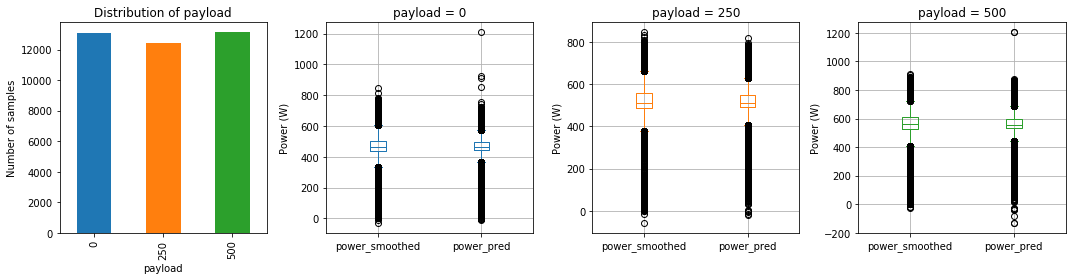

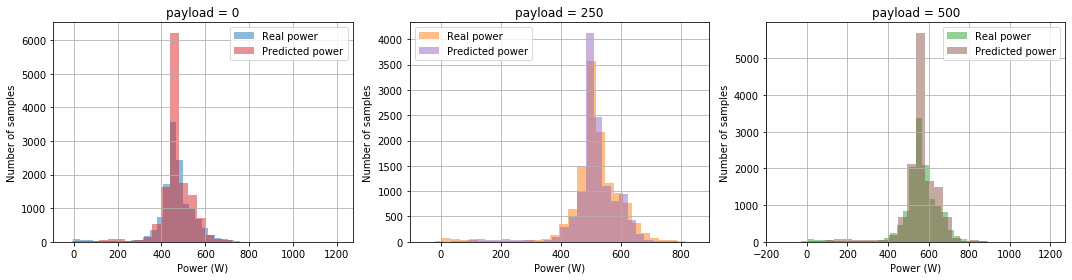

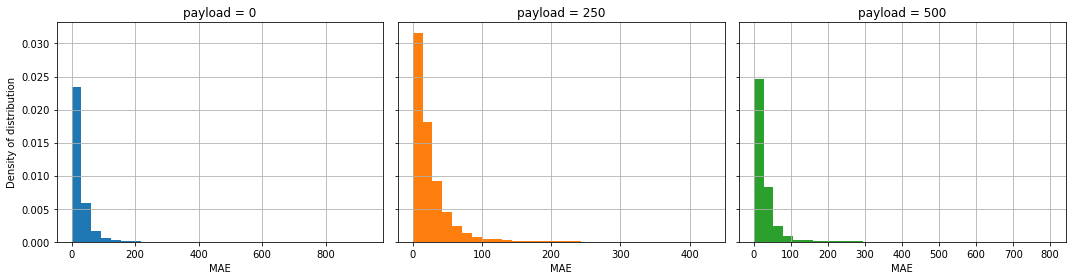

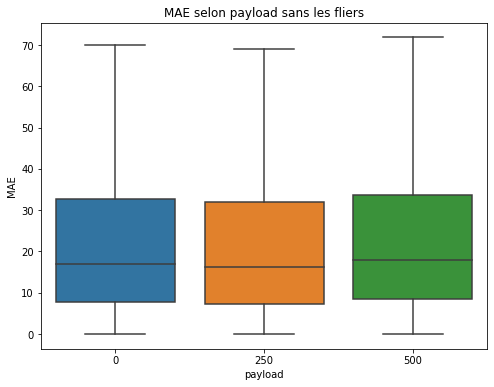

In [6]:
def create_subplots(nbrows, nbcols, figsize, nbplots=None, squeeze=False, sharey=False):
    _, axs = plt.subplots(nbrows, nbcols, figsize=figsize, squeeze=squeeze, sharey=sharey)
    if nbplots is not None :    
        diff = nbrows * nbcols - nbplots
        if diff > 0 :
            for _ in range(diff) :
                axs.flatten()[-1].remove()
    return axs


def plot_groupby(df, f, layout, columns):
    """ Highlights differences of quality of prediction between subgroups (according to feature f in dataframe df). 
    Plots the number of samples in each subgroups. 
    Plots the boxplots and dispersion histograms of mae in each subgroups, for ground truth (*columns[0]*) and predicted data (*columns[1]*).
    *layout* pour les histogrammes, on met toujours les boxplots en ligne
    """
    num_cat = df[f].nunique()
    colors = [f"C{i}" for i in range (num_cat)] # default colors 
    axs = create_subplots(1, num_cat+1, (15,4), len(df[f].unique())+1, squeeze=True)
    # histogramme de la colonne qui fera le groupby
    df.groupby(f).size().plot.bar(color=colors, ax=axs[0], title="Distribution of "+f)
    axs[0].set(ylabel="Number of samples")
    # boxplots
    i = 1
    for n, g in df.groupby(f):
        axs[i].set(title=f"{f} = {n}")
        g[columns].plot.box(ax=axs[i], color=colors[i-1])
        axs[i].set(ylabel="Power (W)")
        axs[i].grid()
        i += 1
    plt.tight_layout()
    # histogrammes de distribution
    axs = create_subplots(layout[0], layout[1], (15, 4*layout[0]), len(df[f].unique()))
    i = 0
    for n, g in df.groupby(f):
        ax = axs[i//layout[1], i%layout[1]]
        ax.set(title=f"{f} = {n}", xlabel="Power (W)", ylabel="Number of samples")
        g[columns[0]].hist(ax=ax, bins=30, color=colors[i], alpha=0.5, label="Real power")
        g[columns[1]].hist(ax=ax, bins=30, color="C"+str(i+num_cat), alpha=0.5, label="Predicted power")
        i += 1
        ax.legend()
    plt.tight_layout()

    # plot diff mae
    # Calculer la MAE pour chaque groupe de payload
    df['mae'] = abs(df[columns[0]] - df[columns[1]]) 
    # histogrammes de distribution de la mae
    axs = create_subplots(layout[0], layout[1], (15, 4*layout[0]), len(df[f].unique()), sharey=True)
    i = 0
    for n, g in df.groupby(f):
        ax = axs[i//layout[1], i%layout[1]]
        ax.set(title=f"{f} = {n}", xlabel="MAE")
        g["mae"].hist(ax=ax, bins=30, color=colors[i], density=True)
        i += 1
    axs[0,0].set(ylabel="Density of distribution")
    plt.tight_layout()

    # Créer des boxplots pour comparer les MAE de chaque groupe de payload
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=f, y='mae', data=df, showfliers=0)
    plt.title('MAE selon '+f+" sans les fliers")
    plt.xlabel(f)
    plt.ylabel('MAE')
    plt.show()

plot_groupby(testds, "payload", (1, 3), ["power_smoothed", "power_pred"])

In [7]:
testds["mae"].describe()

count    38614.000000
mean        26.346351
std         33.051580
min          0.000308
25%          7.858051
50%         17.064564
75%         32.853887
max        935.297344
Name: mae, dtype: float64